<a href="https://colab.research.google.com/github/uzairaslam19/Time-series-Analysis-for-Malaria/blob/main/Disease_TimSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Disease Time Series Analysis**


In [321]:
#Import the necessary packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.core.dtypes import dtypes
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [322]:
#Load the data from csv file, also change column names removing any spaces, Conver columns to correct types
data = pd.read_csv(r'disease_data.csv', index_col=1,
                   names=[ 'sr','DRC_cases',
                          'DRC_deaths', 'rfe'],
                   header=0, dtype = {2:'int16', 3:'int16', 4:float},parse_dates=True,dayfirst=True).drop(['sr'],axis=1)

In [323]:
#Checking the first 5 rows of data to see how it looks like
data.head()

,DRC_cases,DRC_deaths,rfe
2019-01-04,798,17,0.0
2019-01-11,618,14,0.0
2019-01-18,708,17,18.1
2019-01-25,748,19,18.2
2019-02-01,681,18,18.7


In [324]:
# Check the data for any missing values or correct datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2019-01-04 to 2023-08-11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DRC_cases   241 non-null    int16  
 1   DRC_deaths  241 non-null    int16  
 2   rfe         241 non-null    float64
dtypes: float64(1), int16(2)
memory usage: 4.7 KB


In [325]:
# Basic Descriptive Statistics
statistics = data.describe()
statistics

,DRC_cases,DRC_deaths,rfe
count,241.000000,241.000000,241.000000
mean,439.008299,6.419087,35.384647
std,354.487987,5.315336,29.197779
min,0.000000,0.000000,0.000000
25%,198.000000,2.000000,13.700000
50%,361.000000,5.000000,32.500000
75%,602.000000,9.000000,52.100000
max,2056.000000,24.000000,132.500000


We can see some basic descriptive statistics of the data:
* All three columns have values which are 0.
* DRC_cases has some outliers as some values are above 2000 number of cases
* There are no missing values in the data

### **Lets check how the Data looks like**

In [326]:
data.head(5)

,DRC_cases,DRC_deaths,rfe
2019-01-04,798,17,0.0
2019-01-11,618,14,0.0
2019-01-18,708,17,18.1
2019-01-25,748,19,18.2
2019-02-01,681,18,18.7


## **Uni-Variate Analysis**

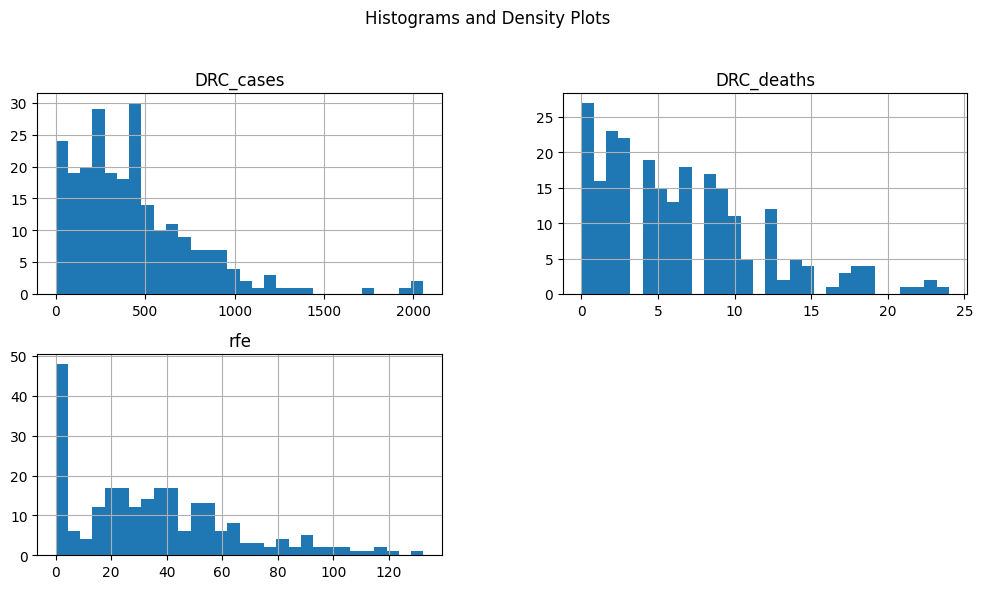

In [327]:
# Histograms and Density Plots
data.hist(bins=30, figsize=(12, 6))
plt.suptitle('Histograms and Density Plots', x=0.5, y=1.02)
plt.show()


## **Distribution Analysis**
**DRC_cases:** We can see from the plots above that DRC_cases is distributed mostly at lower levels, such that majority of the cases are below 500 for a weekly basis. But we do notice that there are some instances where the cases have gone upto 2000 for some weeks.

**DRC_death:** For DRC_deaths mostly the deaths are in the ranges of 0-13 But there are cases where the death have gone up to 23 though these are not many, only 2-3 cases.

**RFE(Rain Fall Estimates):** Rainfall estimates follow a more dispersed pattern, where most of the time the rfe is 0 upto 50 times, out of 240 total data rows. whereas the rest are dispersed from 18 to 59 they occur around 10-15 times.

## **Relationship Plots - Bi-Variate Analysis**

In [328]:
#Lets Define a function to plot scatter plots for our columns relationships
def scatter(column1: pd.Series, column2: pd.Series, x_label: str, y_label: str) -> None:
  """ Simple function to plot Scatter plots:
    params:
      column1: First column to be plotted on x axis
      column2: Second Column to be plotted on y-axis
      x_label: Label for x axis
      y_label: lable for y axis
    returns:
      Matplotlib Scatter Plot
  """
  plt.figure(figsize=(12, 6))
  plt.scatter(column1, column2)
  plt.title(f'Scatter Plot: {x_label} vs. {y_label}')
  plt.xlabel(f'{x_label}')
  plt.ylabel(f'{y_label}')
  plt.show()

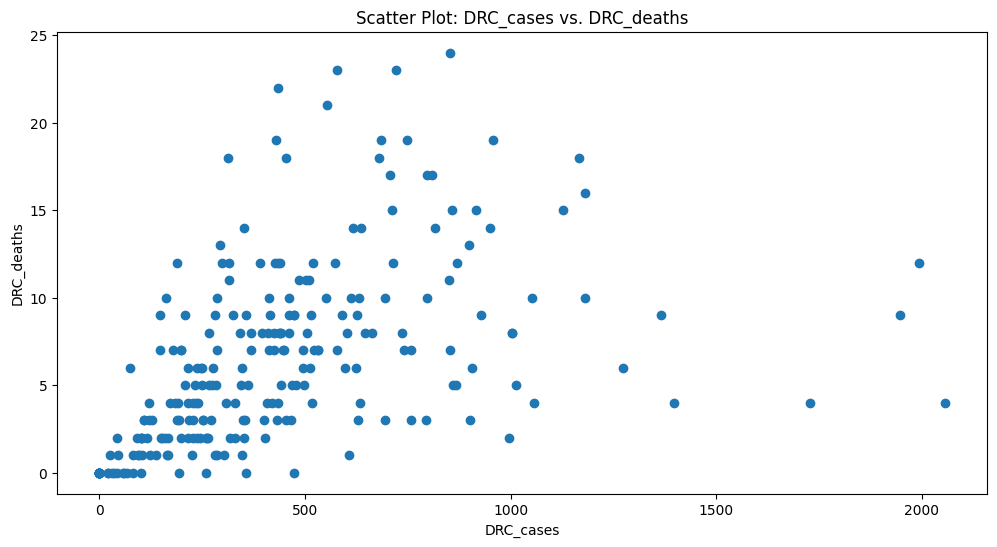

In [329]:
# Scatter Plot for DRC_cases and DRC_deaths
scatter(data['DRC_cases'],data['DRC_deaths'],'DRC_cases', 'DRC_deaths')


### **Analysis from above scatter plot:**
* There is definitely a positive relation between cases and deaths, as we can note on x-axis as Cases increase so do the deaths on y-axis. An increase in cases results in an increase in deaths.

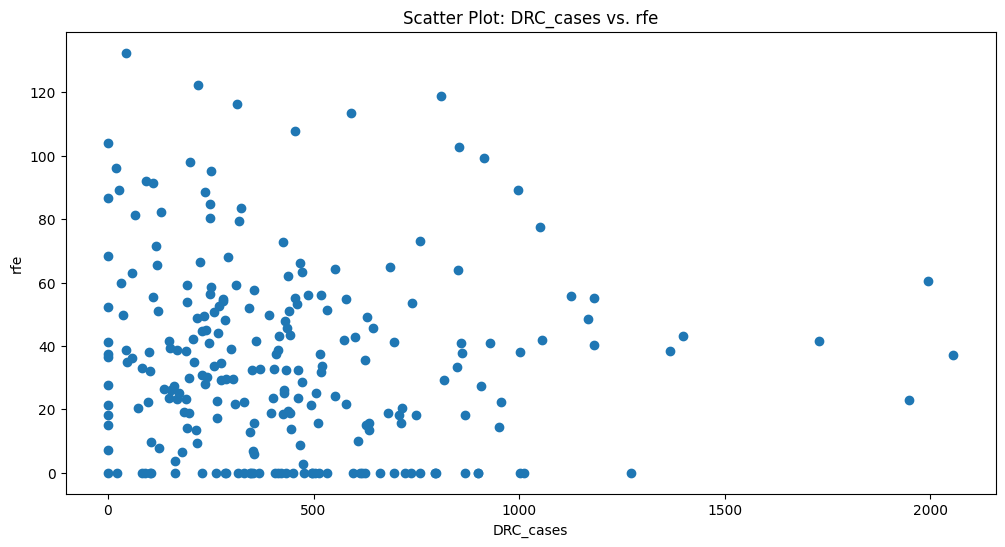

In [330]:
# Scatter Plot for DRC_cases and rfe
scatter(data['DRC_cases'],data['rfe'],'DRC_cases', 'rfe')


### Analysis for above Scatter plot:
* There seems to be some positive relation between cases and rfe. Seems like when rfe increases so do the number of cases.

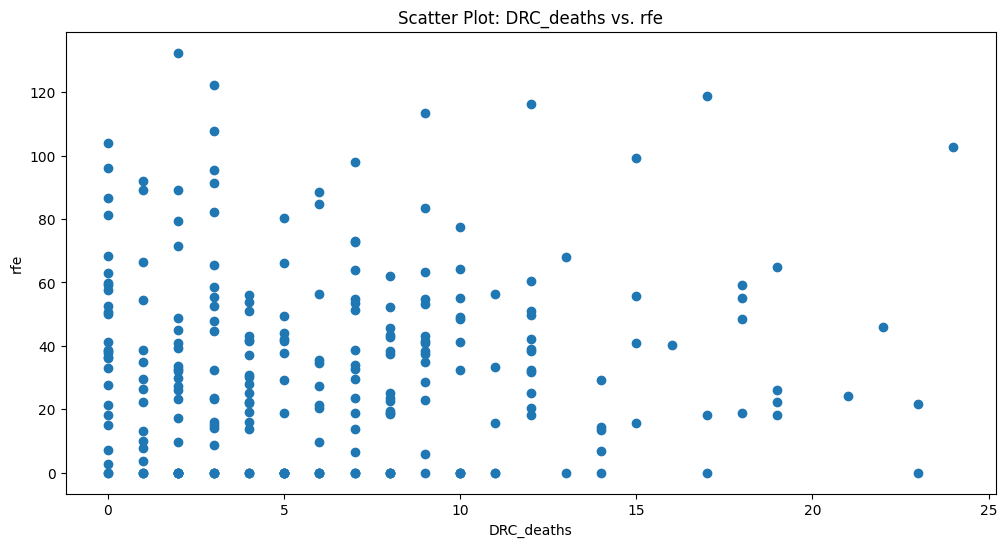

In [331]:
# Scatter Plot for DRC_deaths and rfe
scatter(data['DRC_deaths'],data['rfe'],'DRC_deaths', 'rfe')

### Analysis for above Scatter plot:
* Very minimal or no relation between deaths and rfe. There seems to be some kind of negative relation but its very minimal.

## Correlation Analysis

* Lets do further analysis using correlation matrix

In [332]:
# Display the correlation matrix
correlation_matrix = data[1:].corr()

In [333]:
print("Correlation Matrix")
correlation_matrix.style.background_gradient(cmap='Greens')

Correlation Matrix


,DRC_cases,DRC_deaths,rfe
DRC_cases,1.000000,0.476846,-0.069169
DRC_deaths,0.476846,1.000000,0.013788
rfe,-0.069169,0.013788,1.000000


## Key Take Aways from Correlation Matrix
### DRC_cases and DRC_deaths:

The correlation between DRC_cases and DRC_deaths is 0.476846, which is positive.
A positive correlation suggests that as the number of DRC_cases increases, the number of DRC_deaths also tends to increase. However, the correlation is moderate (not very strong), indicating that there is a relationship, but it's not a perfect one.


### DRC_cases and rfe:

The correlation between 'DRC_cases' and 'rfe' is `-0.069169`, indicating a `weak negative correlation` between the number of disease cases and the rainfall estimate. This means that as the `number of disease cases increases`, there is a `slight tendency for the rainfall estimate to decrease`.

### DRC_deaths and rfe:

The correlation between 'DRC_deaths' and 'rfe' is `0.013788`, indicating a `weak positive correlation` between the number of disease deaths and the rainfall estimate. This suggests that as the `number of disease deaths increases`, there is a `slight tendency for the rainfall estimate to increase`.

## Time Series plot for DRC_cases

In [334]:
# lets Define a function to plot the timeseries data for each column
def plot(column: pd.Series, label: str, y_label: str) -> None:

    """This function plots the timeseries plot for a column with Date on x axis
    column on y axis
    params:
      Column: Dataset Column to be plotted
      label: Label for Title
      y_label: label for y-axis
      """

    plt.figure(figsize=(12, 6))
    plt.plot(column, label=label, color='green')
    plt.title(f'Time Series Plot of {label}')
    plt.xlabel('week_endings')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

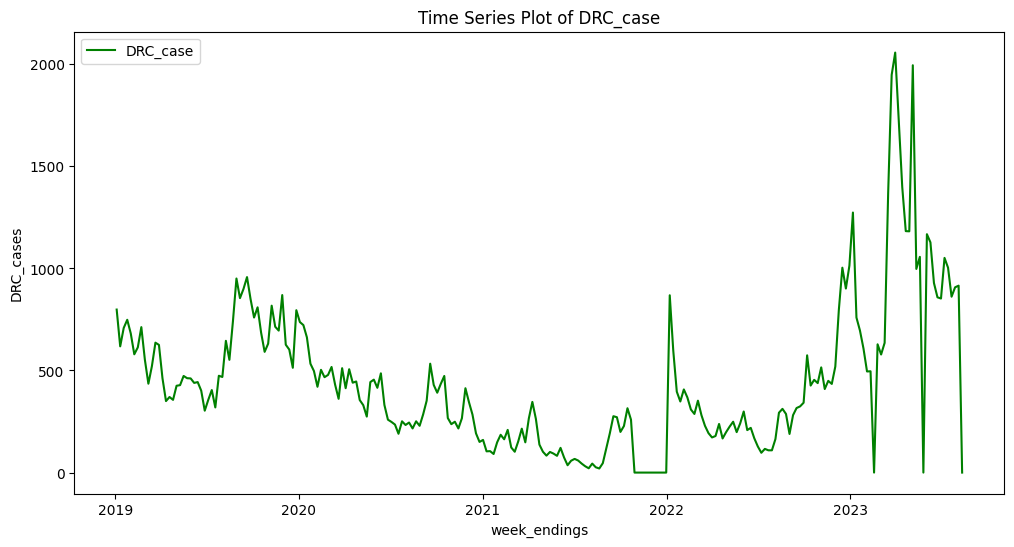

In [335]:
# Time Series Plot for DRC_cases
plot(data['DRC_cases'],'DRC_case','DRC_cases')

### DRC_cases time series analysis:

As observed the time series for DRC_cases shows some level of seasonality and trend. The data also appears to be non-stationary, which is an essential aspect to consider for ARIME modeling.
* There are certain points when cases suddenly become zero.
* There are also peaks in cases during early 2022, early to mid 2023.

## Check for Stationarity for DRC_cases

Any timeseries data that has to be modeled needs to be stationary. Stationary means that it’s statistical properties are more or less constant with time. These are the following properties that any stationarity model will have:

Constant Mean
Constant Variance(There can be variations, but the variations shouldn’t be irregular)
No seasonality(No repeating patterns in the data set)

So first step is to check for stationarity. If the data set is not stationary, we will have to convert it to a stationary series.

One way of check for stationarity is to use Augmented Dickey-Fuller Test and check the p-value
* If p < 0.05: Data is stationary
* If p > 0.05: Data is not stationary

**Augmented Dickey-Fuller test (ADF test) on the 'DRC_cases' time series data. This test is commonly used to determine whether a time series is stationary or not.**

In [336]:
# Defining a Function for ADF test to check stationarity of the data
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [337]:
ad_test(data['DRC_cases'])

1. ADF :  -1.5426353397014723
2. P-Value :  0.5123248042090188
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression: 230
5. Critical Values :
	 1% :  -3.459105583381277
	 5% :  -2.8741898504150574
	 10% :  -2.5735117958412097


Here's the interpretation of the results:
* **ADF Statistic (1. ADF):** The ADF statistic is -1.5426. This value is important for assessing stationarity. The more negative it is, the more likely the time series is stationary. In our case, it's not strongly negative, suggesting that the time series may not be stationary.

* **P-Value (2. P-Value):** The p-value is 0.5123. The p-value is used to determine the significance of the ADF statistic. In this case, the p-value is relatively high (greater than 0.05). A high p-value indicates that you fail to reject the null hypothesis, which means that the time series is likely non-stationary.

* **Number of Lags (3. Num Of Lags):** The ADF test includes lag order selection, and it has determined that 10 lags were used in the regression.

* **Number of Observations Used (4. Num Of Observations Used For ADF Regression):** The ADF regression used 230 observations to perform the test.

* **Critical Values (5. Critical Values):** The critical values represent the significance levels at which the ADF statistic should be compared. In this case, the critical values are provided at 1%, 5%, and 10%. If the ADF statistic is less than these critical values, it indicates that the time series is stationary. However, in our case, the ADF statistic is greater than all these critical values, suggesting **`Non-Stationarity`**.

**Overall, the results of the ADF test suggest that the 'DRC_cases' time series is likely non-stationary. Non-stationary time series data often exhibit trends and seasonality, which may require differencing or other transformations to make the data stationary for further analysis or modeling.**




### Applying differencing to make series stationary

In [338]:
data['DRC_cases_diff'] = data['DRC_cases'].diff()
data.dropna(inplace=True)
result_diff = adfuller(data['DRC_cases_diff'])
adf_stat_diff, p_value_diff = result_diff[0], result_diff[1]

adf_stat_diff, p_value_diff

(-8.340635182083284, 3.1832332762465883e-13)

Since we applied the difference, the ADF statistic is -8.34 and p-value is 3.18 e-13, which is significantly less then 0.05, this suggests that the series is stationary

### ARIMA Model on DRC_cases

In [370]:
#Fit the ARIMA model on full dataset
arima_model_cases = ARIMA(data['DRC_cases'], order=(1, 1, 1))
arima_fit_cases = arima_model_cases.fit()
arima_fit_cases.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              DRC_cases   No. Observations:                  240
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1593.647
Date:                Mon, 16 Oct 2023   AIC                           3193.293
Time:                        14:11:30   BIC                           3203.722
Sample:                    01-11-2019   HQIC                          3197.496
                         - 08-11-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6249      0.033     19.003      0.000       0.560       0.689
ma.L1         -0.8903      0.024    -37.489      0.000      -0.937      -0.844
sigma2      3.618e+04   1225.216     29.530      0.000    3.38e+04    3.86e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):              1689.55
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               8.88   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [371]:
arima_aic_cases = arima_fit_cases.aic
arima_bic_cases = arima_fit_cases.bic

### Lets Try SARIMAX Model on DRC_cases

In [373]:
# Lets try Sarimax also
sarimax_model_cases = SARIMAX(data['DRC_cases'],order=(1,1,1), seasonal_order =(1,1,1,52))
sarimax_fit_cases = sarimax_model_cases.fit()
sarimax_fit_cases.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          DRC_cases   No. Observations:                  240
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -1278.959
Date:                            Mon, 16 Oct 2023   AIC                           2567.918
Time:                                    14:14:00   BIC                           2584.073
Sample:                                01-11-2019   HQIC                          2574.464
                                     - 08-11-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6670      0.116     -5.760      0.000      -0.894      -0.440
ma.L1          0.4782      0.141      3.401      0.001       0.203       0.754
ar.S.L52      -0.1340      0.867     -0.155      0.877      -1.833       1.565
ma.S.L52      -0.1656      0.887     -0.187      0.852      -1.903       1.572
sigma2      4.997e+04   2670.562     18.712      0.000    4.47e+04    5.52e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               500.24
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               9.80   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [374]:
#Extract AIC and BIC from SARIMAX model
sarimax_aic_cases = sarimax_fit_cases.aic
sarimax_bic_cases = sarimax_fit_cases.bic

arima_aic_cases, arima_bic_cases, sarimax_aic_cases, sarimax_bic_cases

(3193.293051973563, 3203.7224426293574, 2567.917848199798, 2584.0733912840706)

##Lets forecast for 2024

In [375]:
# Generating ARIMA Forecast
arima_forecast_cases =arima_fit_cases.get_forecast(steps=52)
arima_forecast_mean_cases = arima_forecast_cases.predicted_mean

#Generating SARIMAX Forecast
sarimax_forecast_cases =sarimax_fit_cases.get_forecast(steps=52)
sarimax_forecast_mean_cases = sarimax_forecast_cases.predicted_mean

In [376]:
# Calculating mean suqared error(MSE) for the forecasts

arima_mse_cases = mean_squared_error(data['DRC_cases'].iloc[-52:],arima_forecast_mean_cases)
sarimax_mse_cases = mean_squared_error(data['DRC_cases'].iloc[-52:], sarimax_forecast_mean_cases)

#display the forecast metrics
arima_mse_cases, sarimax_mse_cases


(228749.3143875018, 105611.86244265965)

### Lets Plot ARIMA Forecast

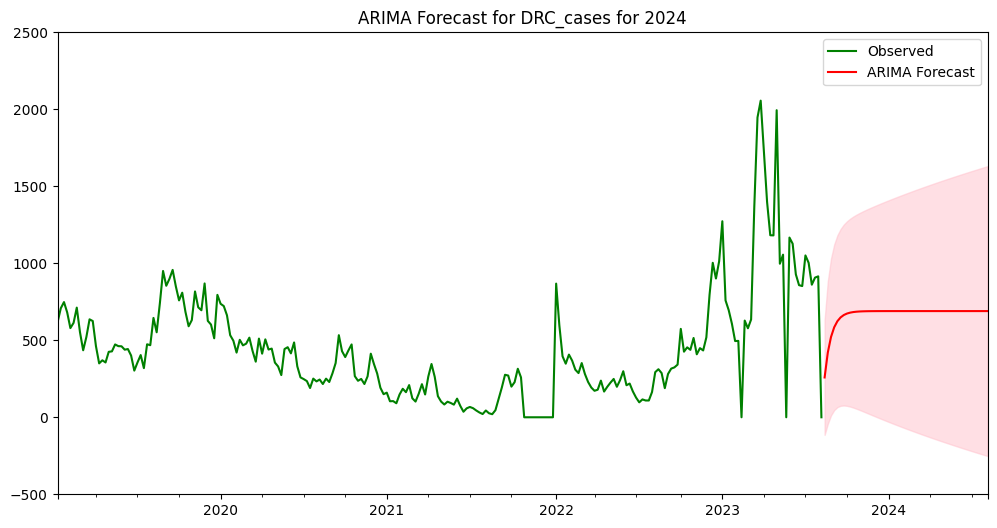

In [377]:
# Plot the forecasts and confidence intervals for 'sarimax_forecast'

fig, ax = plt.subplots(figsize=(12, 6))
data['DRC_cases'].plot(ax=ax, label='Observed',color='g')
arima_forecast_mean_cases.plot(ax=ax, label='ARIMA Forecast', color='r')
ci_arima_cases = arima_forecast_cases.conf_int()
ax.fill_between(ci_arima_cases.index, ci_arima_cases.iloc[:, 0], ci_arima_cases.iloc[:, 1], color='pink',alpha=0.5)
ax.set_ylim(-500, 2500)
plt.title("ARIMA Forecast for DRC_cases for 2024")
plt.legend()
plt.show()

### **Checking SARIMAX on Actual Data for validation**

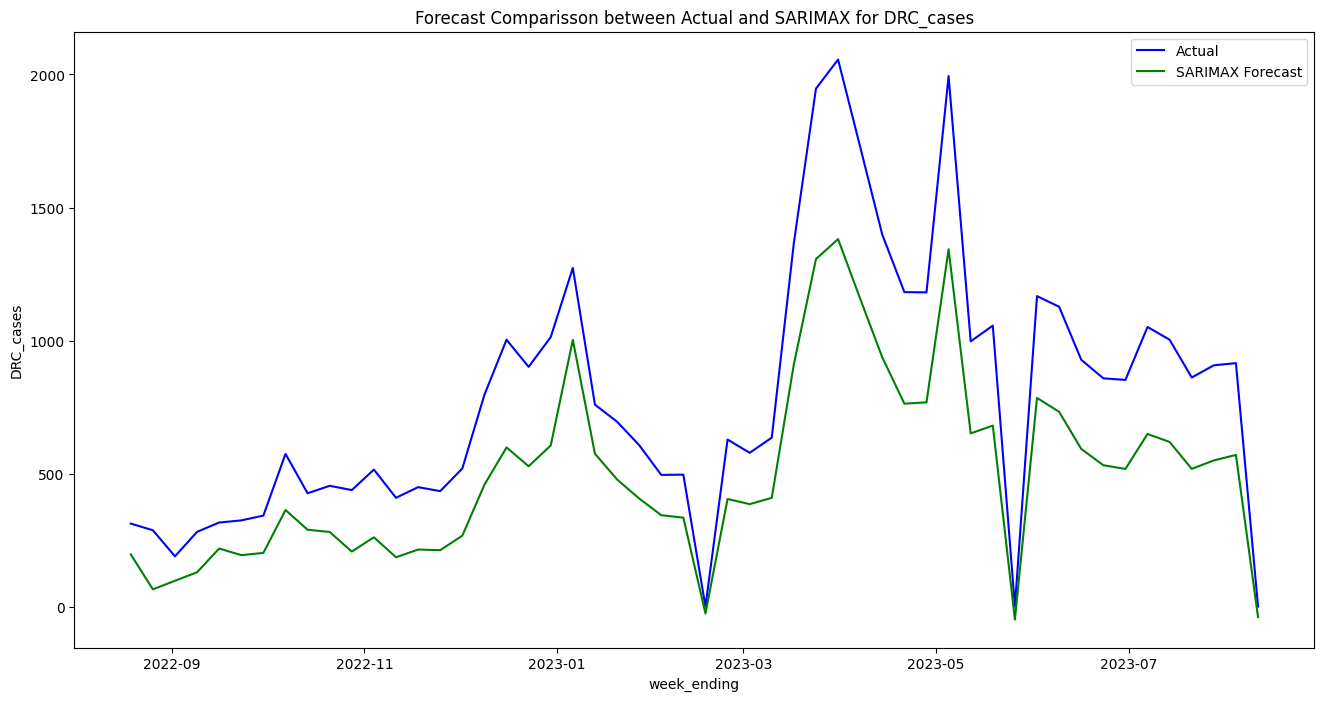

In [427]:
#Generate forecast using SARIMAX
sarimax_forecast =sarimax_fit_cases.get_forecast(steps=52)
sarimax_forecast_mean = sarimax_forecast.predicted_mean

# Calculating mean suqared error(MSE) for the forecasts

sarimax_mse = mean_squared_error(data['DRC_cases'].iloc[-52:], sarimax_forecast_mean)

#display the forecast metrics
plt.figure(figsize=(16, 8))

plt.plot(data['DRC_cases'].iloc[-52:], label='Actual',color='blue')
#plotting SARIMAX forecast
plt.plot(data.index[-52:],sarimax_forecast_mean, label='SARIMAX Forecast',color ='green')

plt.xlabel('week_ending')
plt.ylabel('DRC_cases')
plt.title('Forecast Comparisson between Actual and SARIMAX for DRC_cases')
plt.legend()
plt.show()

### Now Lets Plot SARIMAX forecast for cases

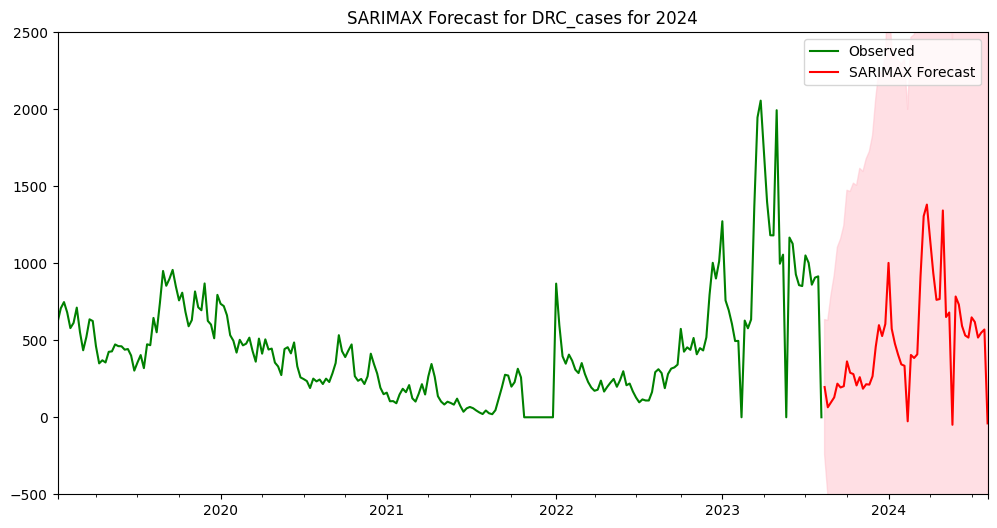

In [378]:
# Plot the forecasts and confidence intervals for 'sarimax_forecast'

fig, ax = plt.subplots(figsize=(12, 6))
data['DRC_cases'].plot(ax=ax, label='Observed',color='g')
sarimax_forecast_mean_cases.plot(ax=ax, label='SARIMAX Forecast', color='r')
ci_sarimax_cases = sarimax_forecast_cases.conf_int()
ax.fill_between(ci_sarimax_cases.index, ci_sarimax_cases.iloc[:, 0], ci_sarimax_cases.iloc[:, 1], color='pink',alpha=0.5)
ax.set_ylim(-500, 2500)
plt.title("SARIMAX Forecast for DRC_cases for 2024")
plt.legend()
plt.show()

### Lets check the Mean Squared Error

In [379]:
# Display the MSE
print("SARIMAX Mean Squared Error (MSE):", sarimax_mse_cases)

SARIMAX Mean Squared Error (MSE): 105611.86244265965


While this is a bit high Mean Square error, this is much better than Arima model. Most advance models can maybe further optimze the forecast

# **Time Series Plot for DRC_deaths**

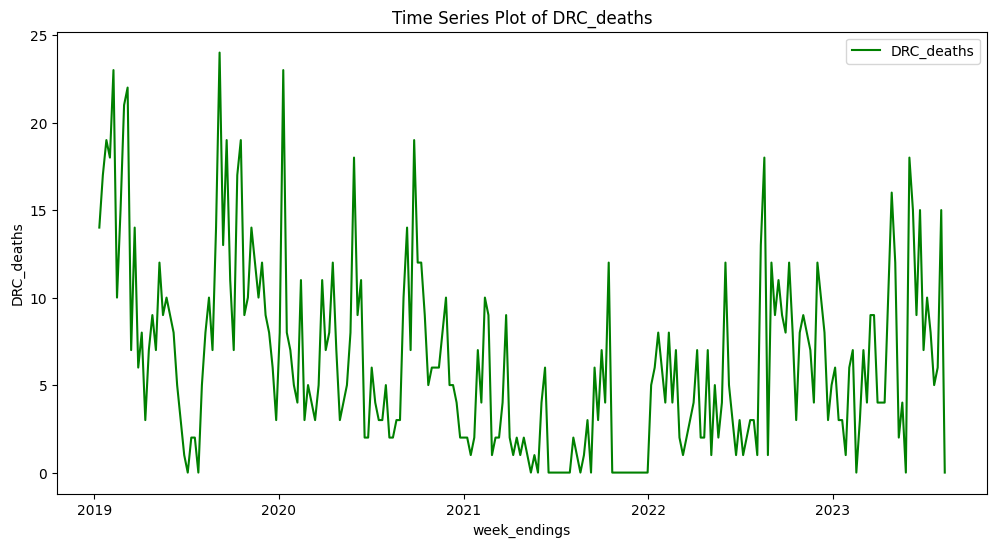

In [380]:
plot(data['DRC_deaths'],'DRC_deaths','DRC_deaths')

DRC_deaths:

The number of reported deaths follows a pattern similar to DRC_cases, with peaks occurring during the same time periods.
There are also periods with very few or no reported deaths.
It's noteworthy that there's a significant increase in deaths in September 2019 ,early 2020 ,mid 2022 and early 2023.

In [21]:
# Lets check the Augmented Dickey-Fuller test for DRC_death
ad_test(data['DRC_deaths'])

1. ADF :  -4.162199733268143
2. P-Value :  0.0007629986122255464
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression: 236
5. Critical Values :
	 1% :  -3.4583663275730476
	 5% :  -2.8738660999177132
	 10% :  -2.5733390785693766


The results of the Augmented Dickey-Fuller test (ADF test) for the 'DRC_deaths' time series are as follows:

* **ADF Statistic (1. ADF):** The ADF statistic is -4.1622. This value is quite negative, which is a good sign for stationarity. More negative values make it more likely that the time series is stationary.

* **P-Value (2. P-Value):** The p-value is 0.000763. This p-value is very low (less than 0.05), indicating statistical significance. In this case, we can reject the null hypothesis, suggesting that the time series is likely stationary.

* **Number of Lags (3. Num Of Lags):** The ADF test has determined that 4 lags were used in the regression.

* **Number of Observations Used (4. Num Of Observations Used For ADF Regression):** The ADF regression used 236 observations for the test.

* **Critical Values (5. Critical Values):** The critical values represent the significance levels at which the ADF statistic should be compared. In this case, the ADF statistic is less than the critical values at 1%, 5%, and 10%. This suggests that the time series is likely stationary.

**The results of the ADF test for 'DRC_deaths' strongly indicate that the time series is stationary. A low p-value and a highly negative ADF statistic, along with the ADF statistic being less than the critical values, all support the conclusion of stationarity. This is important for time series analysis and modeling as it simplifies the analysis and modeling process.**

## **Lets Try Arima for Deaths**

In [381]:
#Fit the ARIMA model on full dataset
arima_model_deaths = ARIMA(data['DRC_deaths'], order=(1, 1, 1))
arima_fit_deaths = arima_model_deaths.fit()
arima_fit_deaths.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             DRC_deaths   No. Observations:                  240
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -684.260
Date:                Mon, 16 Oct 2023   AIC                           1374.519
Time:                        14:20:20   BIC                           1384.949
Sample:                    01-11-2019   HQIC                          1378.722
                         - 08-11-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3016      0.072      4.194      0.000       0.161       0.443
ma.L1         -0.8593      0.049    -17.446      0.000      -0.956      -0.763
sigma2        17.8971      1.261     14.196      0.000      15.426      20.368
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                45.99
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             0.72
Prob(H) (two-sided):                  0.32   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [382]:
arima_aic_deaths = arima_fit_deaths.aic
arima_bic_deaths = arima_fit_deaths.bic

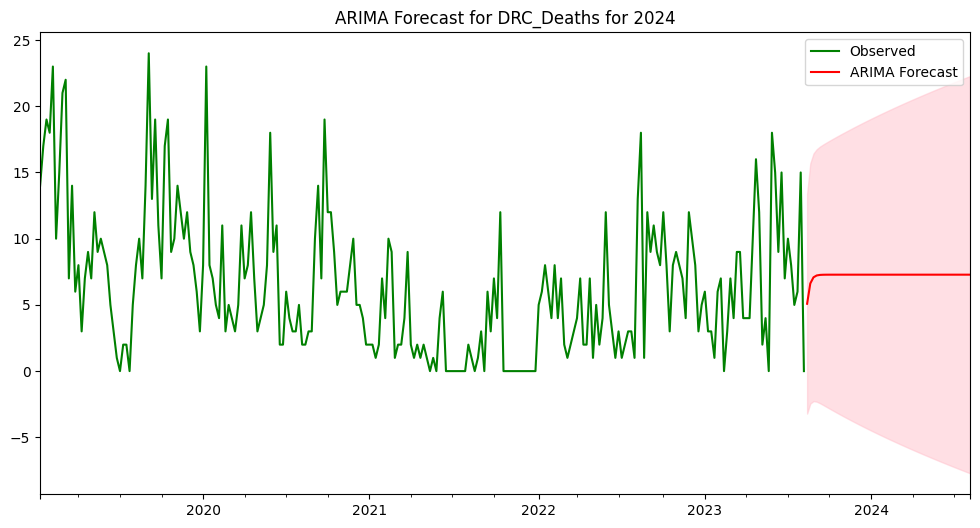

In [383]:
# Plot the forecasts and confidence intervals for 'sarimax_forecast'
arima_forecast_deaths =arima_fit_deaths.get_forecast(steps=52)
arima_forecast_mean_deaths = arima_forecast_deaths.predicted_mean

fig, ax = plt.subplots(figsize=(12, 6))
data['DRC_deaths'].plot(ax=ax, label='Observed',color='g')
arima_forecast_mean_deaths.plot(ax=ax, label='ARIMA Forecast', color='r')
ci_arima_deaths = arima_forecast_deaths.conf_int()
ax.fill_between(ci_arima_deaths.index, ci_arima_deaths.iloc[:, 0], ci_arima_deaths.iloc[:, 1], color='pink',alpha=0.5)
plt.title("ARIMA Forecast for DRC_Deaths for 2024")
plt.legend()
plt.show()

## **Lets try SARIMAX for deaths**

In [384]:
# Lets try Sarimax also
sarimax_model_deaths = SARIMAX(data['DRC_deaths'],order=(1,1,1), seasonal_order =(1,1,1,52))
sarimax_fit_deaths = sarimax_model_deaths.fit()
sarimax_fit_deaths.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         DRC_deaths   No. Observations:                  240
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -566.462
Date:                            Mon, 16 Oct 2023   AIC                           1142.925
Time:                                    14:23:50   BIC                           1159.080
Sample:                                01-11-2019   HQIC                          1149.471
                                     - 08-11-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2238      0.093      2.403      0.016       0.041       0.406
ma.L1         -0.8655      0.056    -15.496      0.000      -0.975      -0.756
ar.S.L52      -0.2893      0.168     -1.719      0.086      -0.619       0.041
ma.S.L52      -0.4042      0.199     -2.031      0.042      -0.794      -0.014
sigma2        21.7582      2.330      9.339      0.000      17.192      26.325
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.96   Prob(JB):                         0.72
Heteroskedasticity (H):               0.82   Skew:                             0.08
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [385]:
#Extract AIC and BIC from ARIMA & SARIMAX model
sarimax_aic_deaths = sarimax_fit_deaths.aic
sarimax_bic_deaths = sarimax_fit_deaths.bic

arima_aic_deaths, arima_bic_deaths, sarimax_aic_deaths, sarimax_bic_deaths

(1374.5193411691375, 1384.948731824932, 1142.9247078849926, 1159.0802509692655)

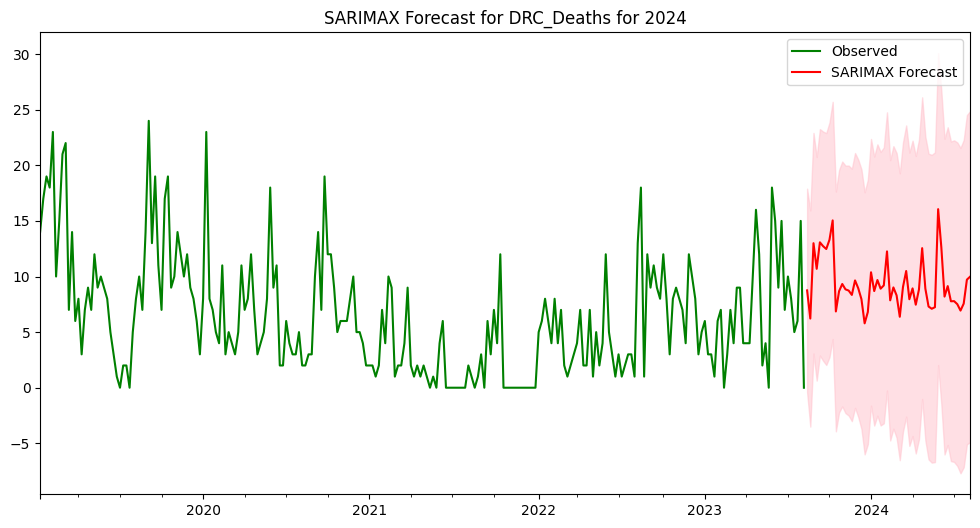

In [387]:
# Plot the forecasts and confidence intervals for 'sarimax_forecast'
sarimax_forecast_deaths =sarimax_fit_deaths.get_forecast(steps=52)
sarimax_forecast_mean_deaths = sarimax_forecast_deaths.predicted_mean

fig, ax = plt.subplots(figsize=(12, 6))
data['DRC_deaths'].plot(ax=ax, label='Observed',color='g')
sarimax_forecast_mean_deaths.plot(ax=ax, label='SARIMAX Forecast', color='r')
ci_sarimax_deaths = sarimax_forecast_deaths.conf_int()
ax.fill_between(ci_sarimax_deaths.index, ci_sarimax_deaths.iloc[:, 0], ci_sarimax_deaths.iloc[:, 1], color='pink',alpha=0.5)
plt.title("SARIMAX Forecast for DRC_Deaths for 2024")
plt.legend()
plt.show()

In [388]:
# Calculating mean suqared error(MSE) for the forecasts

arima_mse_deaths = mean_squared_error(data['DRC_deaths'].iloc[-52:], arima_forecast_mean_deaths)
sarimax_mse_deaths = mean_squared_error(data['DRC_deaths'].iloc[-52:], sarimax_forecast_mean_deaths)

#display the forecast metrics
arima_mse_deaths, sarimax_mse_deaths


(21.432129383190635, 17.598633924525508)

*Sarimax has lower Mean squared error

```Therefore forecasting with SARIMAX```

## **Time Series plot for rfe**

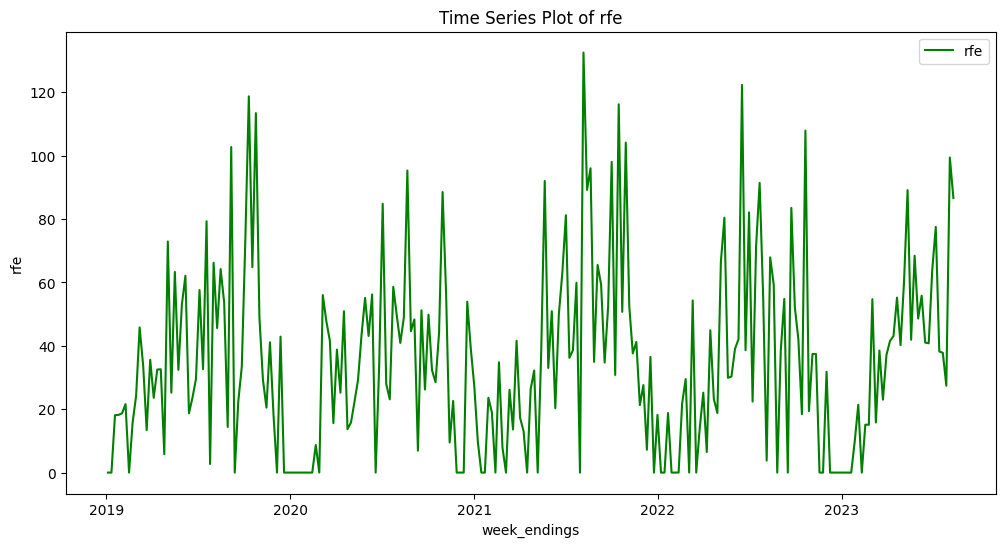

In [22]:
plot(data['rfe'],'rfe','rfe')

## **RFE (rainfall estimates):**

Rainfall estimates (rfe) vary, but there are some periods with consistently low values.
There are spikes in rainfall estimates, especially in early 2019 and late 2022.
Some values of rfe are relatively high, indicating potentially heavy rainfall in certain periods.

In [23]:
ad_test(data['rfe'])

1. ADF :  -4.265860044497914
2. P-Value :  0.0005087277298171692
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression: 237
5. Critical Values :
	 1% :  -3.4582467982399105
	 5% :  -2.8738137461081323
	 10% :  -2.5733111490323846


The results of the Augmented Dickey-Fuller test (ADF test) for the variable associated with "rfe" (rainfall estimates) are as follows:

* **ADF Statistic (1. ADF):** The ADF statistic is -4.2659. This is a negative value, which is a good sign for stationarity. More negative values make it more likely that the time series is stationary.

* **P-Value (2. P-Value):** The p-value is 0.000509. This p-value is very low (less than 0.05), indicating statistical significance. In this case, we can reject the null hypothesis, suggesting that the time series is likely stationary.

* **Number of Lags (3. Num Of Lags):** The ADF test has determined that 3 lags were used in the regression.

* **Number of Observations Used (4. Num Of Observations Used For ADF Regression):** The ADF regression used 237 observations for the test.

* **Critical Values (5. Critical Values):**  In this case, the ADF statistic is less than the critical values at 1%, 5%, and 10%. This suggests that the time series is likely stationary.

**The results of the ADF test for "rfe" strongly indicate that the time series is stationary. A low p-value and a highly negative ADF statistic, along with the ADF statistic being less than the critical values, all support the conclusion of stationarity. This is important for time series analysis and modeling as it simplifies the analysis and modeling process.**

## Applying Arima to rfe to forecast data for 2024

                               SARIMAX Results                                
Dep. Variable:                    rfe   No. Observations:                  240
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1122.146
Date:                Mon, 16 Oct 2023   AIC                           2250.291
Time:                        14:27:00   BIC                           2260.720
Sample:                    01-11-2019   HQIC                          2254.494
                         - 08-11-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1535      0.079     -1.948      0.051      -0.308       0.001
ma.L1         -0.6722      0.070     -9.553      0.000      -0.810      -0.534
sigma2       698.5625     57.129     12.228      0.0

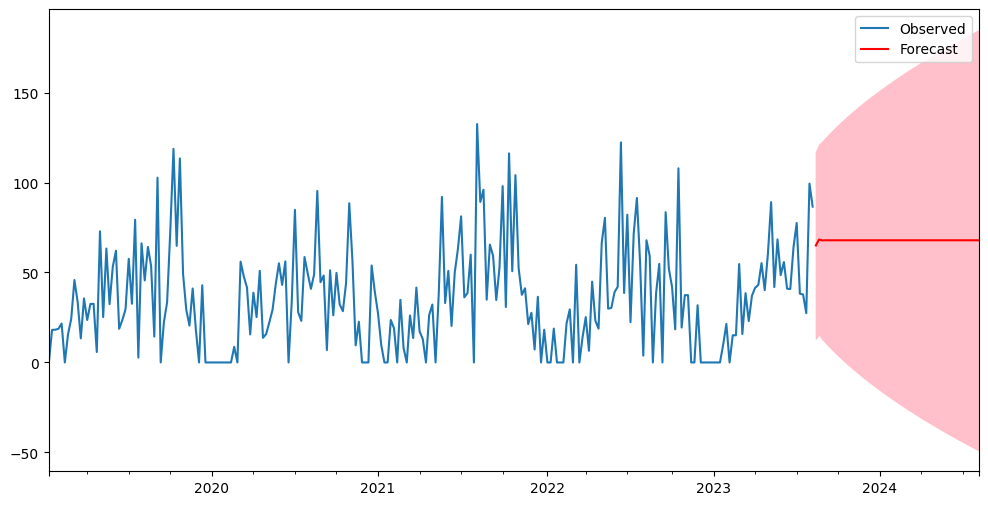

In [389]:
model_rfe = sm.tsa.ARIMA(data['rfe'], order=(1, 1, 1))

results_rfe = model_rfe.fit()

# Print the model summary
print(results_rfe.summary())

# Make forecasts for 2024 (adjust the number of periods as needed)
forecast_rfe = results_rfe.get_forecast(steps=52)

# Plot the forecasts and confidence intervals for 'rfe'
fig, ax = plt.subplots()
data['rfe'].plot(ax=ax, label='Observed', figsize=(12, 6))
forecast_rfe.predicted_mean.plot(ax=ax, label='Forecast', color='r')
ci_rfe = forecast_rfe.conf_int()
ax.fill_between(ci_rfe.index, ci_rfe.iloc[:, 0], ci_rfe.iloc[:, 1], color='pink')
plt.legend()
plt.show()

### **Since ARIMA isnt working, lets stick with SARIMAX**

In [390]:
# Lets try Sarimax also
sarimax_model_rfe = SARIMAX(data['rfe'],order=(1,1,1), seasonal_order =(1,1,1,52))
sarimax_fit_rfe = sarimax_model_rfe.fit()
sarimax_fit_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                rfe   No. Observations:                  240
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -893.312
Date:                            Mon, 16 Oct 2023   AIC                           1796.625
Time:                                    14:27:58   BIC                           1812.781
Sample:                                01-11-2019   HQIC                          1803.171
                                     - 08-11-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1143      0.068     -1.668      0.095      -0.249       0.020
ma.L1         -0.9955      0.105     -9.507      0.000      -1.201      -0.790
ar.S.L52      -0.1091      0.167     -0.654      0.513      -0.436       0.218
ma.S.L52      -0.9842      8.072     -0.122      0.903     -16.806      14.838
sigma2       508.2201   4013.972      0.127      0.899   -7359.021    8375.461
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.04
Prob(Q):                              0.95   Prob(JB):                         0.05
Heteroskedasticity (H):               1.49   Skew:                             0.22
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [391]:
#Extract AIC and BIC from SARIMAX model
sarimax_aic_rfe = sarimax_fit_rfe.aic
sarimax_bic_rfe = sarimax_fit_rfe.bic

sarimax_aic_rfe, sarimax_bic_rfe

(1796.6249738085771, 1812.78051689285)

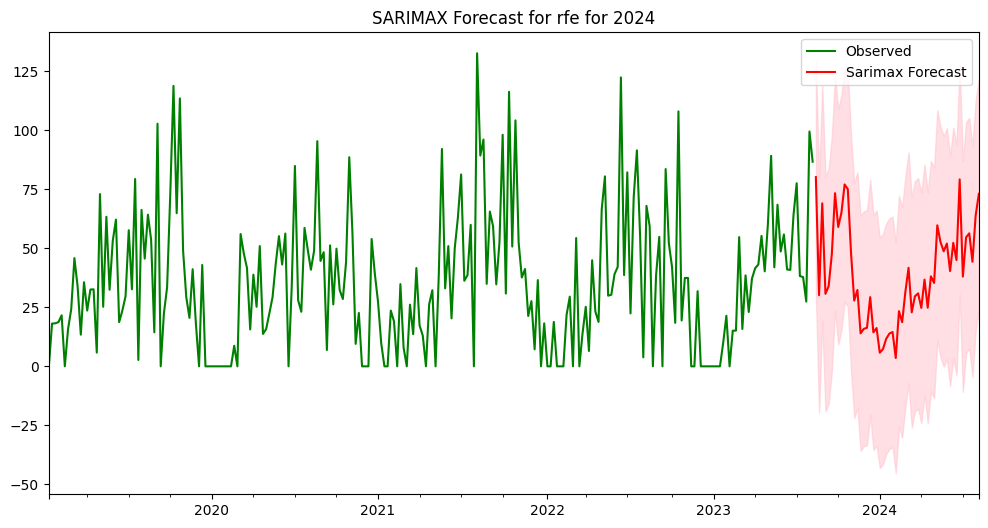

In [392]:
# Plot the forecasts and confidence intervals for 'sarimax_forecast'
sarimax_forecast_rfe =sarimax_fit_rfe.get_forecast(steps=52)
sarimax_forecast_mean_rfe = sarimax_forecast_rfe.predicted_mean

fig, ax = plt.subplots(figsize=(12, 6))
data['rfe'].plot(ax=ax, label='Observed',color='g')
sarimax_forecast_mean_rfe.plot(ax=ax, label='Sarimax Forecast', color='r')
ci_sarimax_rfe = sarimax_forecast_rfe.conf_int()
ax.fill_between(ci_sarimax_rfe.index, ci_sarimax_rfe.iloc[:, 0], ci_sarimax_rfe.iloc[:, 1], color='pink',alpha=0.5)
plt.title("SARIMAX Forecast for rfe for 2024")
plt.legend()
plt.show()

### **Lets compare the Mean Square Error between ARIMA and SARIMAX for RFE**

In [393]:
# Calculating mean suqared error(MSE) for the forecasts
arima_forecast_mean_rfe=forecast_rfe.predicted_mean

arima_mse_rfe = mean_squared_error(data['rfe'].iloc[-52:], arima_forecast_mean_rfe)
sarimax_mse_rfe = mean_squared_error(data['rfe'].iloc[-52:], sarimax_forecast_mean_rfe)

#display the forecast metrics
arima_mse_rfe, sarimax_mse_rfe

(1832.4049557366116, 485.57111226344506)

SARIMAX has lower Mean Squared Error, hence forecasting with SARIMAX

## **Lets Plot all the SARIMAX plots in a single Chart**

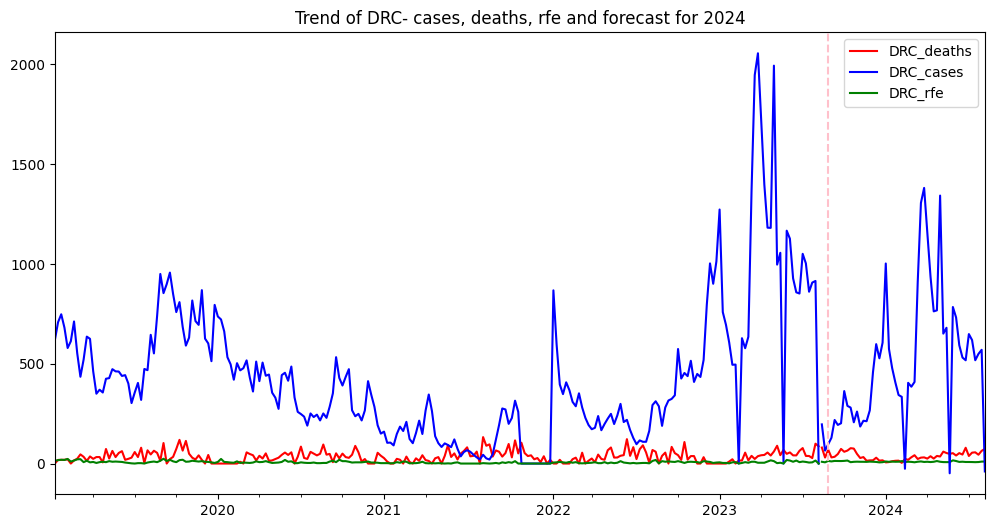

In [421]:
fig, ax = plt.subplots(figsize=(12, 6))
data['rfe'].plot(ax=ax,color='r',)
data['DRC_cases'].plot(ax=ax,color='blue')
data['DRC_deaths'].plot(ax=ax,color='g')
labels= ['DRC_deaths','DRC_cases','DRC_rfe']
sarimax_forecast_mean_rfe.plot(ax=ax, label='Sarimax rfe', color='r')
sarimax_forecast_mean_deaths.plot(ax=ax, label='SARIMAX deaths', color='g')
sarimax_forecast_mean_cases.plot(ax=ax, label='SARIMAX cases', color='blue')
ax.axvline(x='2023-09-01', color='pink', linestyle='--', label='September 2023')
plt.title("Trend of DRC- cases, deaths, rfe and forecast for 2024")
plt.legend(labels=labels)
plt.show()